In [106]:
# Import statements
import numpy as numpy
import pandas as pd
import seaborn as sns #for plotting
import matplotlib.pyplot as plt
import random

In [107]:
# Define datasets for individual inhibitory checkpoints
data = pd.read_csv('data/ab_ag.tsv', sep='\t')
pd1 = data[data['compound'].str.contains('PD-1', na=False)]
pdl1 = data[data['compound'].str.contains('PD-L1', na=False)]
ctla4 = data[data['compound'].str.contains('CTLA-4', na=False)]
kir = data[data['compound'].str.contains('KIR', na=False)]
lag3 = data[data['compound'].str.contains('LAG', na=False)]
tim3 = data[data['compound'].str.contains('TIM3', na=False)]

In [108]:
# Filter out necessary columns
pd1 = pd1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
pdl1 = pdl1[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
ctla4 = ctla4[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
kir = kir[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
lag3 = lag3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]
tim3 = tim3[['pdb', 'Hchain', 'Lchain', 'antigen_chain', 'antigen_type', 'antigen_name', 'compound', 'resolution', 'method']]

In [109]:
combined_dataset = [pdl1, pd1, ctla4, kir, lag3, tim3]

# Shuffle the list randomly
random.shuffle(combined_dataset)

# Concatenate them in the new random order
merged_df = pd.concat(combined_dataset, ignore_index=True)
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

In [110]:
shuffled_df = shuffled_df[shuffled_df['resolution'] < 3.5]
shuffled_df = shuffled_df.dropna()

In [111]:
l = ['CTLA-4', 'TIM3', 'PD-1', 'PD-L1', 'KIR', 'LAG3']

new_df = pd.DataFrame(index = l)

for item in l:
    count = shuffled_df[shuffled_df['compound'].str.contains(item, na=False)].shape[0]
    new_df.loc[item, 'count'] = count

new_df = new_df.reset_index()
new_df.columns = ['checkpoint', 'count'] 

In [112]:
# 1. Filter all relevant rows: those with 'mab' OR 'M6903'
ab_mask = shuffled_df['compound'].str.contains('mab|M6903', na=False, case=False)
shuffled_df_ab = shuffled_df[ab_mask]

# 2. Extract antibody names
shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)

# 3. Fill in M6903 manually where missing
m6903_mask = shuffled_df_ab['compound'].str.contains('M6903', na=False)
shuffled_df_ab.loc[m6903_mask, 'antibody'] = shuffled_df_ab.loc[m6903_mask, 'antibody'].fillna('M6903')

# # 4. Extract checkpoint names
checkpoints_pattern = r'\b(PD-1|PD-L1|CTLA-4|KIR2DL3|TIM3)\b'
shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)

# # 5. Final formatting
shuffled_df_ab = shuffled_df_ab[['antibody', 'checkpoint', 'pdb', 'Hchain', 'Lchain', 'antigen_chain']]
shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

shuffled_df_ab


/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_74462/2002865464.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['antibody'] = shuffled_df_ab['compound'].str.extract(r'\b(\w*mab)\b', expand=False)
/var/folders/vf/ygq5vvrx3fbcsv9n_5277nmr0000gn/T/ipykernel_74462/2002865464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shuffled_df_ab['checkpoint'] = shuffled_df_ab['compound'].str.extract(checkpoints_pattern, expand=False)


,antibody,checkpoint,pdb,Hchain,Lchain,antigen_chain
1,TISLELIZUMAB,PD-1,7cgw,H,L,P
3,PEMBROLIZUMAB,PD-1,5b8c,B,A,C
4,IPILIMUMAB,CTLA-4,5xj3,J,K,L
6,PEMBROLIZUMAB,PD-1,5ggs,A,B,Z
8,CEMIPLIMAB,PD-1,8gy5,A,B,Q
9,M6903,TIM3,6txz,I,M,B
10,IPILIMUMAB,CTLA-4,7su0,I,M,D
11,CEMIPLIMAB,PD-1,8gy5,H,L,P
12,PEMBROLIZUMAB,PD-1,5b8c,E,D,F
13,IPILIMUMAB,CTLA-4,9dq3,H,L,C


In [113]:
pdb_list = shuffled_df_ab['pdb'].unique().tolist()
#shuffled_df_ab['antibody'] = shuffled_df_ab['antibody'].str.upper()

with open('pdb_list.txt', 'w') as f:
    for pdb in pdb_list:
        f.write(pdb + '\n')

# Epitope Mapping and Interface Area Try-Out

In [114]:
# nicht generalisierter Code 
from pymol import cmd

# Input 
pdb_file = "7cu5.pdb"           # Replace with your file path
antibody_chains = "Q"         # Replace with your antibody chains
antigen_chain = "A"             # Replace with your antigen chain
cutoff_distance = 5.0           # Distance cutoff in Å

# Load structure 
cmd.reinitialize()
cmd.load(pdb_file)

# Define selections
cmd.select("antibody", f"chain {antibody_chains}")
cmd.select("antigen", f"chain {antigen_chain}")

# Epitope: antigen residues near antibody 
cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

epitope_area = cmd.get_area("epitope")
print(f"Epitope surface area: {epitope_area:.2f} Å²")

# Visualization
cmd.show("cartoon", "all")
cmd.show("sticks", "epitope")
cmd.color("yellow", "epitope")
cmd.label("epitope", "resn + resi")

# Save session
output_name = pdb_file.replace(".pdb", "_epitope.pse")
cmd.save(output_name)
print(f"Epitope mapping done. Saved session as {output_name}")


Epitope surface area: 845.33 Å²
Epitope mapping done. Saved session as 7cu5_epitope.pse


In [115]:
# make a list of the columns 
shuffled_df_ab = shuffled_df_ab[['pdb', 'Hchain', 'Lchain', 'antigen_chain']]
extracted_list = shuffled_df_ab.values.tolist()

extracted_list

[['7cgw', 'H', 'L', 'P'],
 ['5b8c', 'B', 'A', 'C'],
 ['5xj3', 'J', 'K', 'L'],
 ['5ggs', 'A', 'B', 'Z'],
 ['8gy5', 'A', 'B', 'Q'],
 ['6txz', 'I', 'M', 'B'],
 ['7su0', 'I', 'M', 'D'],
 ['8gy5', 'H', 'L', 'P'],
 ['5b8c', 'E', 'D', 'F'],
 ['9dq3', 'H', 'L', 'C'],
 ['6txz', 'H', 'L', 'A'],
 ['5xxy', 'H', 'L', 'A'],
 ['7wvm', 'C', 'D', 'F'],
 ['7su0', 'H', 'L', 'C'],
 ['7cu5', 'A', 'A', 'Q'],
 ['9dq4', 'H', 'L', 'A'],
 ['5xj3', 'G', 'H', 'I'],
 ['6txz', 'K', 'O', 'D'],
 ['8tui', 'H', 'L', 'A'],
 ['5x8l', 'H', 'M', 'C'],
 ['5x8l', 'G', 'L', 'B'],
 ['5x8l', 'J', 'O', 'E'],
 ['7wvm', 'A', 'B', 'E'],
 ['5jxe', 'D', 'C', 'B'],
 ['5jxe', 'G', 'F', 'A'],
 ['5xj4', 'H', 'L', 'A'],
 ['6k0y', 'A', 'B', 'C'],
 ['5x8m', 'B', 'C', 'A'],
 ['5ggr', 'H', 'L', 'Z'],
 ['5tru', 'H', 'L', 'C'],
 ['7su1', 'H', 'L', 'C'],
 ['5b8c', 'H', 'G', 'I'],
 ['7cu5', 'B', 'B', 'E'],
 ['5xj3', 'D', 'E', 'F'],
 ['7bxa', 'H', 'L', 'P'],
 ['5ggv', 'H', 'L', 'Y'],
 ['5xj3', 'A', 'B', 'C'],
 ['5x8l', 'S', 'N', 'D'],
 ['5grj', 'H

In [116]:
import os
from pymol import cmd
import pandas as pd

# input 
root_folder = "structures"
cutoff_distance = 5.0  # in Å distance
hbond_cutoff = 3.5  # in Å distance for hydrogen bonds
salt_cutoff = 4.0  # in Å distance for salt bridges

# Ensure extracted_list is defined
if 'extracted_list' not in locals():
    extracted_list = []  # Replace with actual data if available

# Your extracted list from your DataFrame Format: [pdb_id, H_chain, L_chain, antigen_chain]

# Convert to a dictionary for easy lookup
pdb_chain_dict = {entry[0].lower(): entry[1:] for entry in extracted_list}  # use .lower() for safe filename matching

results = []

# Loop over all pdb files
for dirpath, _, filenames in os.walk(root_folder):
    for file in filenames:
        if not file.endswith(".pdb"):
            continue

        pdb_id = file.replace(".pdb", "").lower()
        pdb_path = os.path.join(dirpath, file)

        if pdb_id not in pdb_chain_dict:
            print(f"Skipping {pdb_id}: chain info not found")
            continue

        h_chain, l_chain, ag_chain = pdb_chain_dict[pdb_id]
        print(f"Processing {pdb_id}...")

        cmd.reinitialize()
        cmd.load(pdb_path)

        # Selections
        cmd.select("antibody", f"chain {h_chain}+{l_chain}")
        cmd.select("antigen", f"chain {ag_chain}")
        cmd.select("epitope", f"antigen within {cutoff_distance} of antibody")

        # Color antibody chains 
        cmd.color("marine", f"chain {h_chain}")
        cmd.color("skyblue", f"chain {l_chain}")

        # Color antigen chain (e.g., salmon)
        cmd.color("salmon", "antigen")

        # Optional: highlight epitope (already near antigen)
        cmd.color("yellow", "epitope")

        # Surface area
        epitope_area = cmd.get_area("epitope")
        print(f"   ➤ Epitope surface area: {epitope_area:.2f} Å²")

        # Hydrogen bonds
        hbonds = cmd.find_pairs("antibody", "antigen", mode=1, cutoff=hbond_cutoff)
        num_hbonds = len(hbonds)
        print(f"Found {num_hbonds} hydrogen bonds at the interface.")

        # salt bridges 
        # 1) antibody acidic O  → antigen basic N
        cmd.select("acidic_ab", f"chain {h_chain}+{l_chain} and resn ASP+GLU "
                                "and name OD1+OD2+OE1+OE2")
        cmd.select("basic_ag",  f"chain {ag_chain} and resn LYS+ARG+HIS "
                                "and name NZ+NH1+NH2+ND1+NE2")
        sb1 = cmd.find_pairs("acidic_ab", "basic_ag", cutoff=salt_cutoff, mode=1)

        # 2) antigen acidic O → antibody basic N
        cmd.select("acidic_ag", f"chain {ag_chain} and resn ASP+GLU "
                                "and name OD1+OD2+OE1+OE2")
        cmd.select("basic_ab",  f"chain {h_chain}+{l_chain} and resn LYS+ARG+HIS "
                                "and name NZ+NH1+NH2+ND1+NE2")
        sb2 = cmd.find_pairs("acidic_ag", "basic_ab", cutoff=salt_cutoff, mode=1)

        # cleanup salt-bridge selections
        for sel in ("acidic_ab","basic_ag","acidic_ag","basic_ab"):
            cmd.delete(sel)

        num_salt_bridges = len(sb1) + len(sb2)
        print(f"   ➤ Salt bridges: {num_salt_bridges}")

        # save session (optional) 
        session_out = os.path.join(dirpath, f"{pdb_id}_epitope.pse")
        cmd.save(session_out)

        # collect results 
        results.append({
            "pdb_id":              pdb_id,
            "H_chain":             h_chain,
            "L_chain":             l_chain,
            "antigen_chain":       ag_chain,
            "epitope_area":     epitope_area,
            "num_hydrogen_bonds":  num_hbonds,
            "num_salt_bridges":    num_salt_bridges,
            "folder":              os.path.basename(dirpath)
        })

# Save to CSV
df = pd.DataFrame(results)
# Remove duplicate block
# Save results to CSV 
df = pd.DataFrame(results)
df.to_csv("epitope_surface_hbonds_summary.csv", index=False)

print("All done. Results saved to 'epitope_surface_hbonds_summary.csv'")



Skipping 7tzh: chain info not found
Skipping 7tzg: chain info not found
Skipping 7dv4: chain info not found
Processing 5tru...
   ➤ Epitope surface area: 1561.27 Å²
Found 17 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Skipping 6xy2: chain info not found
Processing 7su0...
   ➤ Epitope surface area: 1579.15 Å²
Found 15 hydrogen bonds at the interface.
   ➤ Salt bridges: 1
Processing 7su1...
   ➤ Epitope surface area: 1172.19 Å²
Found 14 hydrogen bonds at the interface.
   ➤ Salt bridges: 2
Skipping 7elx: chain info not found
Skipping 9dq5: chain info not found
Processing 9dq4...
   ➤ Epitope surface area: 2228.67 Å²
Found 212 hydrogen bonds at the interface.
   ➤ Salt bridges: 3
Processing 9dq3...
   ➤ Epitope surface area: 1538.34 Å²
Found 22 hydrogen bonds at the interface.
   ➤ Salt bridges: 2
Processing 6rp8...
   ➤ Epitope surface area: 1499.75 Å²
Found 20 hydrogen bonds at the interface.
   ➤ Salt bridges: 0
Processing 5xj3...
   ➤ Epitope surface area: 1485.81 Å²
Found 

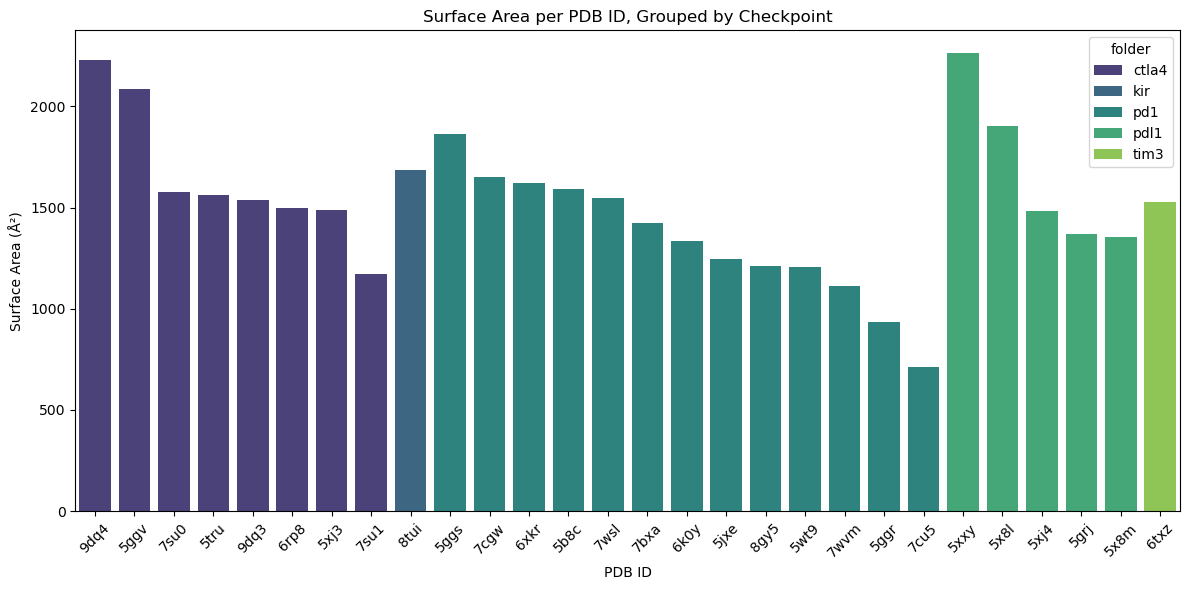

In [117]:
# Convert to DataFrame
df = pd.DataFrame(results)

# Sort by surface area (optional)
df = df.sort_values("epitope_area", ascending=False)

df_sorted = df.sort_values(by=["folder", "epitope_area"], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="pdb_id", y="epitope_area", hue="folder", palette="viridis")


plt.title("Surface Area per PDB ID, Grouped by Checkpoint")
plt.xlabel("PDB ID")
plt.ylabel("Surface Area (Å²)")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show() 
plt.savefig('plots/barplot_surface_area.pdf', bbox_inches = 'tight')
plt.show()




# plt.figure(figsize=(12, 6))
# sns.barplot(data=df, x="pdb_id", y="epitope_area", hue="folder")

# plt.title("Surface Area per PDB ID and Checkpoint")
# plt.xlabel("PDB ID")
# plt.ylabel("Surface Area (Å²)")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


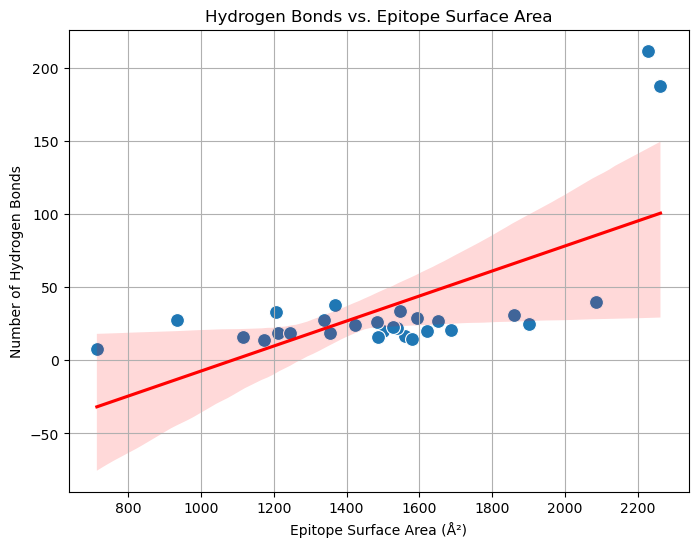

In [118]:
df = pd.read_csv("epitope_surface_hbonds_summary.csv")

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="epitope_area", y="num_hydrogen_bonds", s=100)
sns.regplot(data=df, x="epitope_area", y="num_hydrogen_bonds", scatter=False, color="red")
plt.xlabel("Epitope Surface Area (Å²)")
plt.ylabel("Number of Hydrogen Bonds")
plt.title("Hydrogen Bonds vs. Epitope Surface Area")
plt.grid(True)
plt.show()

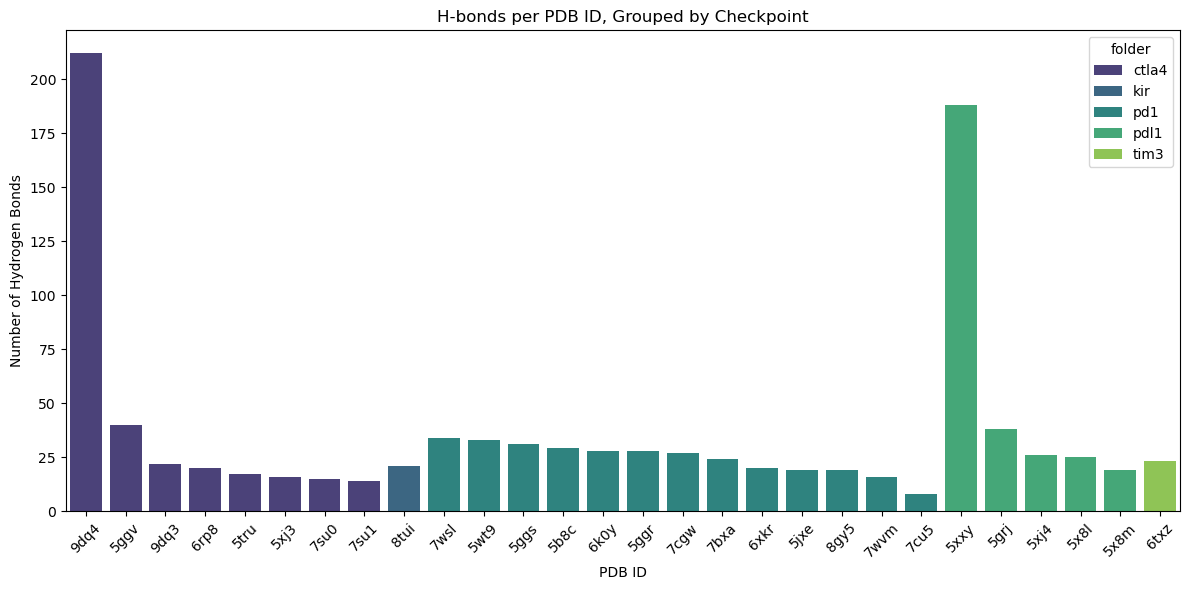

In [119]:

# Convert to DataFrame
df = pd.DataFrame(results)

# Sort by surface area (optional)
df = df.sort_values("num_hydrogen_bonds", ascending=False)

df_sorted = df.sort_values(by=["folder", "num_hydrogen_bonds"], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="pdb_id", y="num_hydrogen_bonds", hue="folder", palette="viridis")


plt.title("H-bonds per PDB ID, Grouped by Checkpoint")
plt.xlabel("PDB ID")
plt.ylabel("Number of Hydrogen Bonds")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show() 
plt.savefig('plots/barplot_h_bonds.pdf', bbox_inches = 'tight')
plt.show()

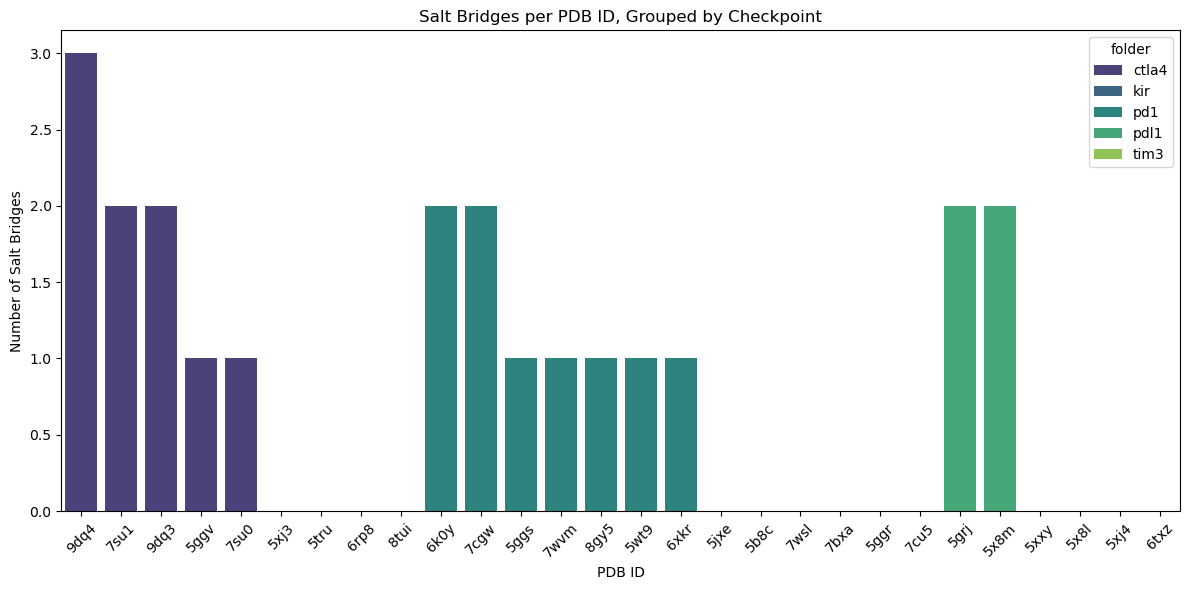

In [121]:

# Convert to DataFrame
df = pd.DataFrame(results)

# Sort by surface area (optional)
df = df.sort_values("num_salt_bridges", ascending=False)

df_sorted = df.sort_values(by=["folder", "num_salt_bridges"], ascending=[True, False])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_sorted, x="pdb_id", y="num_salt_bridges", hue="folder", palette="viridis")


plt.title("Salt Bridges per PDB ID, Grouped by Checkpoint")
plt.xlabel("PDB ID")
plt.ylabel("Number of Salt Bridges")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.show() 
plt.savefig('plots/barplot_salt_bridges.pdf', bbox_inches = 'tight')
plt.show()